# Data Science Challenge

In [108]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [109]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [110]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [111]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [112]:
#Explore columns
print(data.columns)
print(data.dtypes)

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')
id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
dtype: object


In [113]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


#### Steps in data wrangling and cleaning

1. dropping the column id
2. checking if there are missing values in any columns
3. only one column has missing values: reviews_per_month. replacing the missing values by the column average
4. converting the accomodation_type column to a float column with numerical data replacing the three unique types present
5. converting the region column to a float column with numerical data replacing the five unique types present
6. generating scatter plot to understand if there are weird outliers

In [114]:
data = data.drop('id', axis = 1)
print(data.latitude.isna().sum())
print(data.longitude.isna().sum())
print(data.accommodation_type.isna().sum())
print(data.cost.isna().sum())
print(data.minimum_nights.isna().sum())
print(data.number_of_reviews.isna().sum())
print(data.reviews_per_month.isna().sum())
print(data.owner_id.isna().sum())
print(data.owned_hotels.isna().sum())
print(data.yearly_availability.isna().sum())

data.loc[data.reviews_per_month.isna(), 'reviews_per_month'] = round(data.reviews_per_month.mean())

print(data.reviews_per_month.isna().sum())

0
0
0
0
0
0
676
0
0
0
0


['Entire home/apt' 'Private room' 'Shared room']


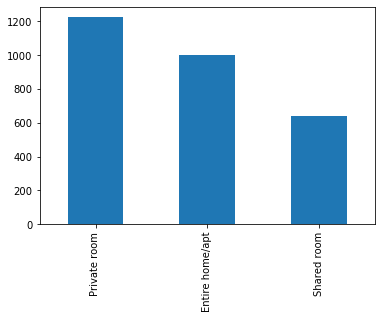

In [115]:
data['accommodation_type'].value_counts().plot(kind='bar')
sns.despine

print(data.accommodation_type.unique())
data.loc[data.accommodation_type == "Entire home/apt", "accommodation_type"] = 1
data.loc[data.accommodation_type == "Private room", "accommodation_type"] = 2
data.loc[data.accommodation_type == "Shared room", "accommodation_type"] = 0

data = data.astype({'accommodation_type': float})

['Manhattan' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island']


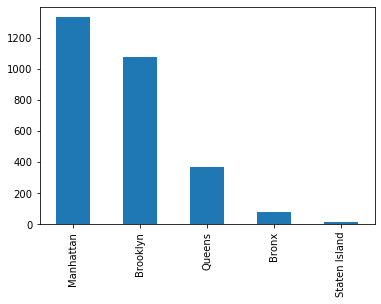

In [116]:
print(data.region.unique())
data['region'].value_counts().plot(kind='bar')
sns.despine

data.loc[data.region == "Manhattan", "region"] = 4
data.loc[data.region == "Brooklyn", "region"] = 3
data.loc[data.region == "Queens", "region"] = 2
data.loc[data.region == "Bronx", "region"] = 1
data.loc[data.region == "Staten Island", "region"] = 0

data = data.astype({'region': float})

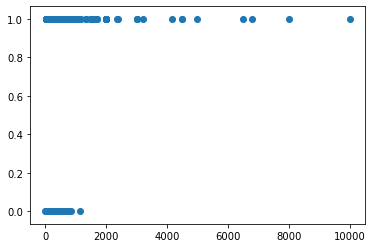

In [117]:
plt.scatter(data.cost, data.yearly_availability)

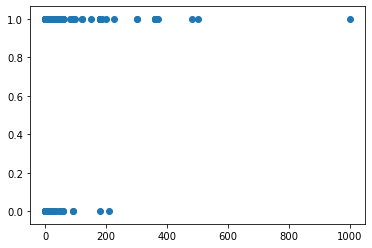

In [118]:
plt.scatter(data.minimum_nights, data.yearly_availability)  

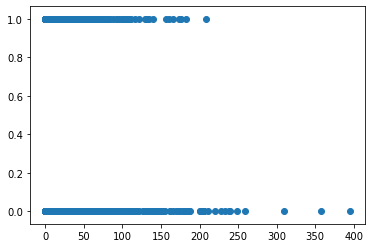

In [119]:
plt.scatter(data.number_of_reviews, data.yearly_availability)

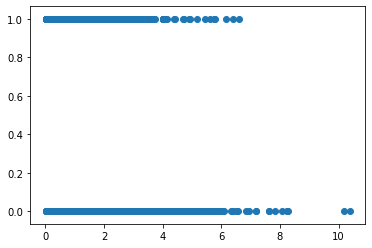

In [120]:
plt.scatter(data.reviews_per_month, data.yearly_availability) 

,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
84,4.0,40.76008,-73.98721,2.0,227,29,0,1.00,219517861,327,1
246,4.0,40.71686,-74.00484,1.0,305,30,0,1.00,107434423,232,0
260,4.0,40.73021,-74.00379,1.0,305,30,0,1.00,107434423,232,0
442,4.0,40.70887,-74.01446,2.0,233,30,0,1.00,107434423,232,1
483,4.0,40.74285,-73.99595,2.0,277,29,0,1.00,219517861,327,1
504,4.0,40.71659,-74.00653,1.0,388,30,0,1.00,107434423,232,0
1154,4.0,40.75194,-73.99501,1.0,243,30,0,1.00,107434423,232,0
1455,4.0,40.73897,-73.99637,1.0,280,30,0,1.00,107434423,232,0
1611,4.0,40.74883,-73.97520,2.0,200,29,0,1.00,219517861,327,1
1990,4.0,40.75146,-73.99000,2.0,215,30,0,1.00,107434423,232,0


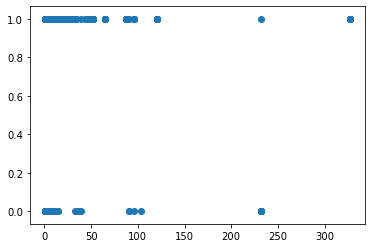

In [121]:
plt.scatter(data.owned_hotels, data.yearly_availability)
filtered_data = data[data['owned_hotels'] > 200]
filtered_data

#### checking the pearson coefficient

Next we check the pearson coefficient to understand the correlation between the numerical variables and the target variable: yearly_availability

We observe there are a few variables that have very low correlation with the target variable.

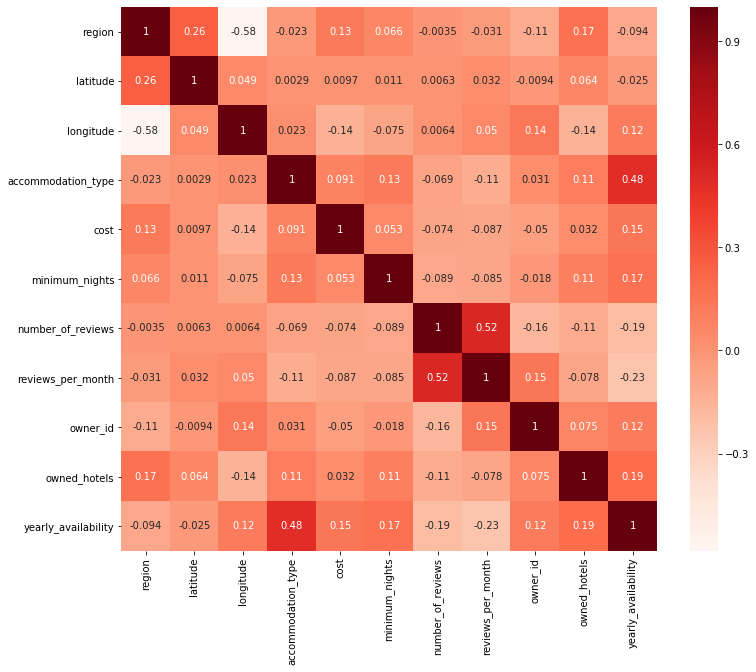

In [122]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### First approach: Logistic Regression

First we try to make a logical regression model. After fitting the model on the training data and testing the accuracy on the testing data (sliced 33% of the dataframe), the accuracy is only ~50%

#### Corrected Approach: Decision Tree
We change our strategy. We choose decision tree to make the model. We obtain accuracy ~88%

In [123]:
from sklearn.model_selection import train_test_split
y = pd.DataFrame(data['yearly_availability'])
data = data.drop('yearly_availability', axis = 1)
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=1)
from sklearn.linear_model import LogisticRegression
semiLRmodel = LogisticRegression(solver='liblinear', random_state=0)
semiLRmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
from sklearn.metrics import classification_report, confusion_matrix
print(semiLRmodel.score(X_test, y_test))
confusion_matrix(y_test, semiLRmodel.predict(X_test))

0.5073839662447257


array([[  0, 467],
       [  0, 481]])

In [125]:
from sklearn import tree
semiDTmodel = tree.DecisionTreeClassifier()
semiDTmodel = semiDTmodel.fit(X_train, y_train)
print(semiDTmodel.score(X_test, y_test))
confusion_matrix(y_test, semiDTmodel.predict(X_test))

0.8776371308016878


array([[414,  53],
       [ 63, 418]])

In [126]:
data.columns.to_list()

['region',
 'latitude',
 'longitude',
 'accommodation_type',
 'cost',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'owner_id',
 'owned_hotels']

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [127]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

submission_df = pd.DataFrame(columns = ['id', 'yearly_availability'])
submission_df['id'] = test_data['id']
test_data = test_data.drop('id', axis = 1)

In [128]:
print(test_data.region.unique())
print(test_data.accommodation_type.unique())

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']
['Shared room' 'Entire home/apt' 'Private room']


In [129]:
test_data.loc[test_data.region == "Manhattan", "region"] = 4
test_data.loc[test_data.region == "Brooklyn", "region"] = 3
test_data.loc[test_data.region == "Queens", "region"] = 2
test_data.loc[test_data.region == "Bronx", "region"] = 1
test_data.loc[test_data.region == "Staten Island", "region"] = 0

test_data = test_data.astype({'region': float})

test_data.loc[test_data.accommodation_type == "Entire home/apt", "accommodation_type"] = 1
test_data.loc[test_data.accommodation_type == "Private room", "accommodation_type"] = 2
test_data.loc[test_data.accommodation_type == "Shared room", "accommodation_type"] = 0

test_data = test_data.astype({'accommodation_type': float})

In [130]:

print(test_data.columns.to_list())

print(test_data.latitude.isna().sum())
print(test_data.longitude.isna().sum())
print(test_data.accommodation_type.isna().sum())
print(test_data.cost.isna().sum())
print(test_data.minimum_nights.isna().sum())
print(test_data.number_of_reviews.isna().sum())
print(test_data.reviews_per_month.isna().sum())
print(test_data.owner_id.isna().sum())
print(test_data.owned_hotels.isna().sum())

test_data.loc[test_data.reviews_per_month.isna(), 'reviews_per_month'] = round(test_data.reviews_per_month.mean())

print(test_data.reviews_per_month.isna().sum())

['region', 'latitude', 'longitude', 'accommodation_type', 'cost', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id', 'owned_hotels']
0
0
0
0
0
0
173
0
0
0




**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [131]:
data.columns.to_list()

['region',
 'latitude',
 'longitude',
 'accommodation_type',
 'cost',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'owner_id',
 'owned_hotels']

#### Using the mutual information gain

The mutual information gain cannot increase the prediction accuracy. That means the prediction accuracy is fairly stable with the input variables.

From the absolute values of the pearson correlation coefficients, we can understand the feature importance. If we sort them in an ascending order, it looks like as follows:
'latitude' < 'region' < 'longitude' < 'owner_id' < 'cost' < 'minimum_nights' < 'number_of_reviews' < 'owned_hotels' < 'reviews_per_month' < 'accommodation_type'

In [132]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
def select_ig_based_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=10)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs = select_ig_based_features(X_train, y_train, X_test)
semiDTmodel2 = tree.DecisionTreeClassifier()
semiDTmodel2 = semiDTmodel2.fit(X_train_fs, y_train)
print(semiDTmodel.score(X_test_fs, y_test))
confusion_matrix(y_test, semiDTmodel2.predict(X_test))

0.8776371308016878


array([[408,  59],
       [ 60, 421]])

In [133]:
cor_list = []
feature_name = data.columns.tolist()
for i in feature_name:
    cor = np.corrcoef(data[i], y)
    print(i, cor[0,1])
    cor_list.append(cor[0,1])
cor_list = [0 if np.isnan(i) else i for i in cor_list]
cor_feature = data.iloc[:,np.argsort(np.abs(cor_list))[-10:]].columns.tolist()
cor_support = [True if i in cor_feature else False for i in feature_name]
print(cor_list, cor_feature, cor_support)

region -0.09367376413132177
latitude -0.02511910040395189
longitude 0.11988189398717922
accommodation_type 0.4808515844145509
cost 0.14757638366762357
minimum_nights 0.17355023840575715
number_of_reviews -0.1916452729428953
reviews_per_month -0.23234457948325832
owner_id 0.12123357520094889
owned_hotels 0.19190647360874957
[-0.09367376413132177, -0.02511910040395189, 0.11988189398717922, 0.4808515844145509, 0.14757638366762357, 0.17355023840575715, -0.1916452729428953, -0.23234457948325832, 0.12123357520094889, 0.19190647360874957] ['latitude', 'region', 'longitude', 'owner_id', 'cost', 'minimum_nights', 'number_of_reviews', 'owned_hotels', 'reviews_per_month', 'accommodation_type'] [True, True, True, True, True, True, True, True, True, True]


> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [134]:
LRmodel = LogisticRegression(solver='liblinear', random_state=0)
LRmodel.fit(data, y)
y_predict = LRmodel.predict(test_data)
submission_df['yearly_availability'] = y_predict

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

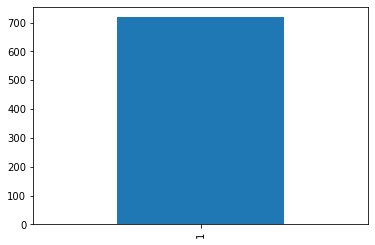

In [135]:
submission_df['yearly_availability'].value_counts().plot(kind='bar')
sns.despine

In [136]:
DTmodel = tree.DecisionTreeClassifier()
DTmodel = DTmodel.fit(data, y)
y_predict = DTmodel.predict(test_data)
submission_df['yearly_availability'] = y_predict

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

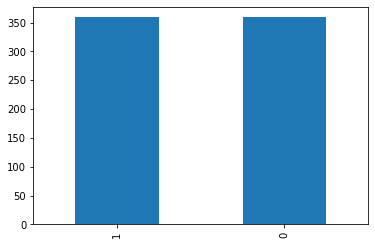

In [137]:
submission_df['yearly_availability'].value_counts().plot(kind='bar')
sns.despine

In [138]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---